In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import transforms
from skimage import io

In [2]:
data = pickle.load(open("datalist.p", "rb"))

In [3]:
len(data["images"])

210

In [4]:
def test_image_plot(image_, labels):
    plt.imshow(image_, cmap="gray")
    print(labels.shape)
    plt.scatter(labels[:,0], labels[:,1], s=2)
    plt.show()

<IPython.core.display.Javascript object>


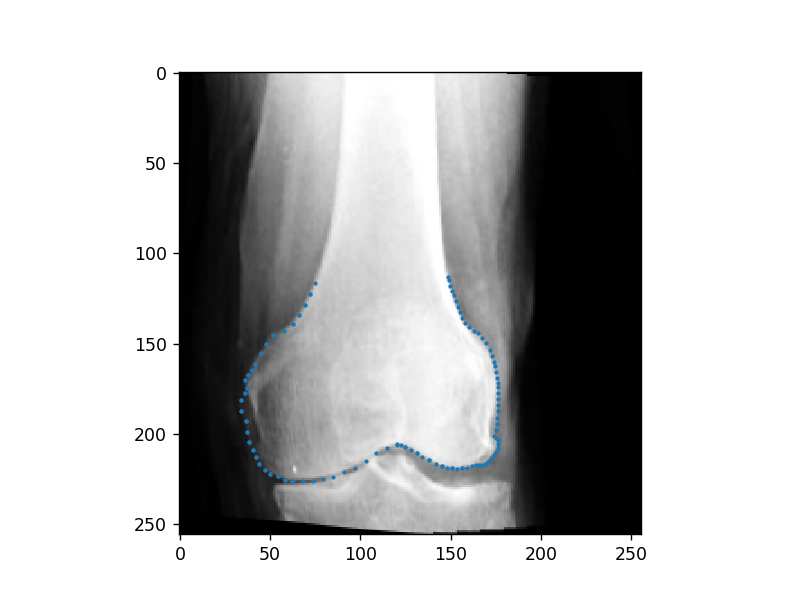

(130, 2)


In [6]:
import random
rdrotate = transforms.RandomRotateSitk(0.1)
rdtranslate = transforms.RandomTranslateSitk(5)
rdishift = transforms.RandomIntensityShiftScale()
eldeform = transforms.ElasticDeformation()
randomApply = transforms.RandomApply([rdrotate, rdtranslate, rdishift, eldeform])
index = np.random.randint(0, len(data["images"]))
sample = randomApply({"image":io.imread(data["images"][index]), "landmarks": np.loadtxt(data["landmarks"][index]) })
test_image_plot(sample["image"], sample["landmarks"])

In [7]:
rdrotate = transforms.RandomRotateSitk(0.2)
rdtranslate = transforms.RandomTranslateSitk(10)
rdishift = transforms.RandomIntensityShiftScale()
eldeform = transforms.ElasticDeformation()
randomApply = transforms.RandomApply([rdrotate, rdtranslate, rdishift, eldeform])
global_counter = len(data["images"])
new_images = []
new_landmarks = []
new_bounding = []
for image_path, landmark_path, bounding_box in zip(data["images"], data["landmarks"], data["bounding_box"]):
    for i in range(50):
        sample = {"image":io.imread(image_path), "landmarks": np.loadtxt(landmark_path) }
        sample = randomApply(sample)
        new_image_path = ".\\aug_images\\"+str(global_counter)+".jpg"
        new_landmark_path = ".\\aug_landmarks\\"+str(global_counter)+".txt"
        io.imsave(new_image_path, sample["image"])
        new_images.append(new_image_path)
        np.savetxt(new_landmark_path, sample["landmarks"])
        new_landmarks.append(new_landmark_path)
        new_bounding.append(bounding_box)
        global_counter += 1
data["images"] += new_images
data["landmarks"] += new_landmarks
data["bounding_box"] += new_bounding

In [8]:
pickle.dump(data, open("datalist.p", "wb"))